# Librairies

In [1]:
import project_functions as pf
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()
sns.set(rc={"figure.figsize":(15, 6)},style="whitegrid")

# Portfolio

Importons les données :

In [2]:
# récupérons les données des prix sauvegardés dans le fichier prices.csv
datas = pd.read_csv('datas/prices.csv', sep=',')

# On récupère les tickers stockés dans le fichier tickers.txt
tickers = pf.get_tickers('datas/tickers.txt')

In [3]:
# Uniquement les prix liées aux tickers
prices = datas[["Date"]+tickers]

# On transforme la colonne Date en index
prices.set_index("Date", inplace=True)
prices.index = pd.to_datetime(prices.index)

prices.head()

,TWEKA.AS,BESI.AS,RAND.AS,AMG.AS,AD.AS,AALB.AS,VPK.AS,HEIO.AS,CRBN.AS,ARCAD.AS,REN.AS,AGN.AS,SHELL.AS
Date,,,,,,,,,,,,,
2010-01-04,9.511971,0.830604,20.259628,8.194963,6.128687,8.183498,20.687563,23.340855,12.707550,10.344408,3.762785,2.645846,10.527839
2010-01-05,9.702948,0.846276,20.558300,8.169353,6.077343,8.148955,20.774899,22.875599,12.619114,10.731913,3.721653,2.639794,10.598575
2010-01-06,9.746504,0.830604,20.655998,8.080161,6.111786,8.310164,20.745789,22.934246,12.772176,10.791023,3.700648,2.630441,10.522962
2010-01-07,9.602434,0.836873,21.258936,8.124315,5.977906,8.267944,20.967762,22.727030,12.925238,10.804158,3.646388,2.683808,10.491251
2010-01-08,9.629237,0.852545,21.099819,8.106654,6.039648,8.283298,20.825846,22.969433,13.340207,10.731913,3.679208,2.766887,10.430267


Calculons les returns journaliers :

In [4]:
returns = pf.daily_asset_return(prices)

returns.head()

,TWEKA.AS,BESI.AS,RAND.AS,AMG.AS,AD.AS,AALB.AS,VPK.AS,HEIO.AS,CRBN.AS,ARCAD.AS,REN.AS,AGN.AS,SHELL.AS
Date,,,,,,,,,,,,,
2010-01-05,0.020078,0.018868,0.014742,-0.003125,-0.008378,-0.004221,0.004222,-0.019933,-0.006959,0.037460,-0.010931,-0.002287,0.006719
2010-01-06,0.004489,-0.018518,0.004752,-0.010918,0.005668,0.019783,-0.001401,0.002564,0.012129,0.005508,-0.005644,-0.003543,-0.007134
2010-01-07,-0.014782,0.007547,0.029189,0.005465,-0.021905,-0.005081,0.010700,-0.009035,0.011984,0.001217,-0.014662,0.020288,-0.003013
2010-01-08,0.002791,0.018726,-0.007485,-0.002174,0.010328,0.001857,-0.006768,0.010666,0.032105,-0.006687,0.009001,0.030955,-0.005813
2010-01-11,0.026444,-0.003676,0.004498,0.020697,0.001076,0.014829,-0.008213,0.014468,-0.000765,-0.022338,-0.006898,-0.015510,0.003275


Nous devons définir une période d'entrainement et de test :
* la période d'entrainement est entre la première date disponible et le 1er Janvier 2015
* la période de test est entre la fin de l'entrainement et la dernière date disponible 

In [5]:
begin_train = returns.index[0]
end_train = "2017-01-01"
begin_test = end_train
end_test = returns.index[-1]

Il est nécessaire de séparer les données entre la phase d'entrainement et la phase de test.

In [6]:
returns_train, returns_test = pf.seperate_df(returns, begin_train, end_train, begin_test, end_test)

Nous pouvons déterminer les returns annualisés année grâce à la ligne de code suivante :

In [7]:
annu_returns_train = pf.annualy_asset_return(returns_train)

## Mean-Variance Portfolio

Let's compute the covariance matrix of the returns.

In [8]:
cov_matrix_train = returns_train.cov()

In [9]:
w1,r,v = pf.gmv_portfolio(returns_train,cov_matrix_train,show=True)

The portfolio return is: 15.15 %
The portfolio volatility is: 14.13 %


In [10]:
w,r,vol = pf.opt_mean_variance(returns_train,cov_matrix_train,obj_rend=0.1,risk_free=0.05,show=True)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.034332203781837566
            Iterations: 15
            Function evaluations: 229
            Gradient evaluations: 15
The portfolio return is: 8.69 %
The portfolio volatility is: 3.43 %


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.09059197359405113
            Iterations: 16
            Function evaluations: 227
            Gradient evaluations: 16
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.865606663555407e-08
            Iterations: 83
            Function evaluations: 1338
            Gradient evaluations: 83
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.06439440276340032
            Iterations: 10
            Function evaluations: 143
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.10791903412475158
            Iterations: 17
            Function evaluations: 248
            Gradient evaluations: 17
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.02349132816332822
            Iterations: 16
            

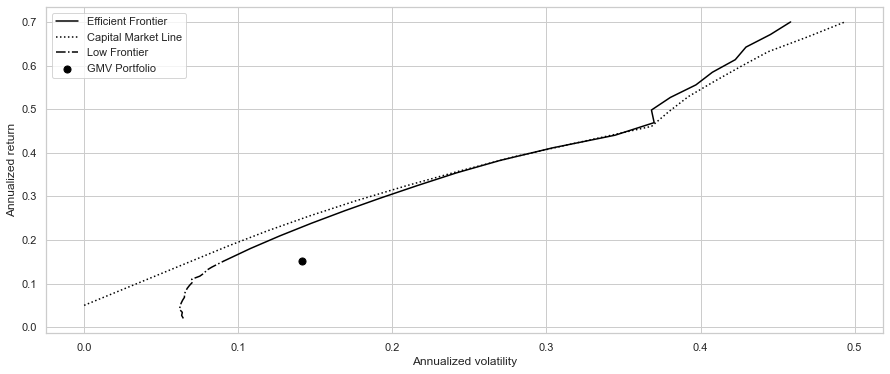

In [11]:
# plot the efficient frontier
eff, eff_rf = pf.efficient_frontier(returns_train,cov_matrix_train,min=0.02,max=0.7,number=20,risk_free=0.05,plot=True)

Calculons le return du portfolio avec les poids souhaités sur la période de test :

In [12]:
portfolio_return_test = pf.portfolio_return(w1,returns_test,show=True)

The portfolio return is: 8.52 %


In [13]:
w

{'TWEKA.AS': 0.029,
 'BESI.AS': 0.073,
 'RAND.AS': -0.027,
 'AMG.AS': -0.013,
 'AD.AS': 0.022,
 'AALB.AS': 0.03,
 'VPK.AS': -0.009,
 'HEIO.AS': 0.021,
 'CRBN.AS': -0.007,
 'ARCAD.AS': -0.029,
 'REN.AS': 0.085,
 'AGN.AS': -0.026,
 'SHELL.AS': -0.021,
 'Risk Free': 0.61}